In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif, SelectKBest, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [60]:
#reading train data
data = pd.read_csv(r"C:\Users\Krutarth\Desktop\Datasets\greyatom_forest\train.csv")
data.drop(columns=['Id'], inplace=True)
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2744,96,17,30,-7,458,245,214,92,351,...,0,0,0,0,0,0,0,0,0,5
1,2504,103,8,30,6,404,234,230,127,1510,...,0,0,0,0,0,0,0,0,0,6
2,2311,30,7,0,0,1230,218,226,143,150,...,0,0,0,0,0,0,0,0,0,4
3,2710,191,26,443,-45,1209,210,249,158,939,...,0,0,0,0,0,0,0,0,0,2
4,2802,91,11,540,18,1699,237,223,115,1084,...,0,0,0,0,0,0,0,0,0,2


In [61]:
#merging the hillshade columns to remove collinearity between independant features
data['Hillshade'] = data.Hillshade_9am + 2*data.Hillshade_Noon + data.Hillshade_3pm
data.drop(columns=['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'], inplace=True)

In [62]:
#combining two columns into one
data['Distance_To_Hydrology'] = np.sqrt(data.Horizontal_Distance_To_Hydrology**2 + data.Vertical_Distance_To_Hydrology**2)
data.drop(columns=['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'], inplace=True)
data.to_csv('data.csv', index=False)
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Hillshade,Distance_To_Hydrology
0,2744,96,17,458,351,1,0,0,0,0,...,0,0,0,0,0,0,0,5,765,30.805844
1,2504,103,8,404,1510,0,0,0,1,0,...,0,0,0,0,0,0,0,6,821,30.594117
2,2311,30,7,1230,150,0,0,0,1,0,...,0,0,0,0,0,0,0,4,813,0.000000
3,2710,191,26,1209,939,0,0,1,0,0,...,0,0,0,0,0,0,0,2,866,445.279687
4,2802,91,11,1699,1084,1,0,0,0,0,...,0,0,0,0,0,0,0,2,798,540.299917


In [63]:
#removing the soil type class
subset_col = []
for col in data.columns:
    if 'Soil_Type' not in col:
        subset_col.append(col)

In [31]:
#removing wilderness area
df = data[subset_col]
df.drop(columns=['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4'],inplace=True)
df.head()

C:\Users\Krutarth\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Cover_Type,Hillshade,Distance_To_Hydrology
0,2744,96,17,458,351,5,765,30.805844
1,2504,103,8,404,1510,6,821,30.594117
2,2311,30,7,1230,150,4,813,0.000000
3,2710,191,26,1209,939,2,866,445.279687
4,2802,91,11,1699,1084,2,798,540.299917


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           9072 non-null   int64  
 1   Aspect                              9072 non-null   int64  
 2   Slope                               9072 non-null   int64  
 3   Horizontal_Distance_To_Roadways     9072 non-null   int64  
 4   Horizontal_Distance_To_Fire_Points  9072 non-null   int64  
 5   Cover_Type                          9072 non-null   int64  
 6   Hillshade                           9072 non-null   int64  
 7   Distance_To_Hydrology               9072 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 567.1 KB


In [33]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Cover_Type,Hillshade,Distance_To_Hydrology
count,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.00000,9072.000000,9072.000000
mean,2749.531415,156.480930,16.529872,1717.954806,1520.420525,4.00000,785.871252,235.622620
std,417.236330,109.411024,8.495603,1322.812625,1121.444963,2.00011,74.218090,214.384464
min,1863.000000,0.000000,0.000000,0.000000,0.000000,1.00000,416.000000,0.000000
25%,2375.750000,65.000000,10.000000,765.000000,730.000000,2.00000,748.000000,67.082039
50%,2755.000000,125.000000,15.000000,1321.000000,1252.000000,4.00000,800.000000,190.432402
75%,3099.000000,258.250000,22.000000,2263.000000,1987.000000,6.00000,839.000000,342.238221
max,3849.000000,360.000000,52.000000,6890.000000,6993.000000,7.00000,895.000000,1304.225824


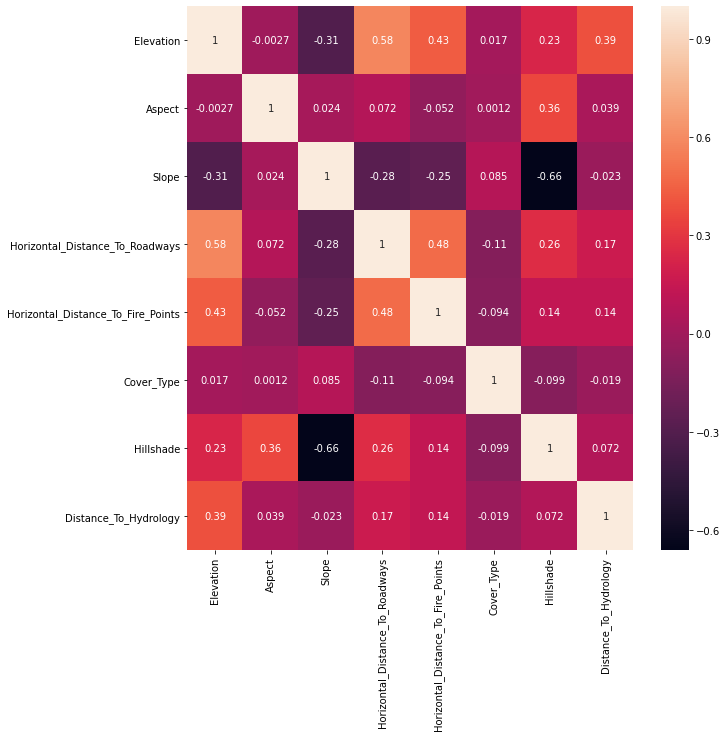

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [35]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type', 'Hillshade',
       'Distance_To_Hydrology'],
      dtype='object')

In [36]:
cd C:\Users\Krutarth\Desktop\Datasets\greyatom_forest

C:\Users\Krutarth\Desktop\Datasets\greyatom_forest


In [37]:
#scaling the values
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Cover_Type'])))
df_scaled.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Hillshade',
       'Distance_To_Hydrology']
df_scaled['Cover_Type'] = df['Cover_Type']
df_scaled.to_csv('data_scaled.csv', index=False)
df_scaled.drop(columns=['Cover_Type'], inplace=True)

In [38]:
df_scaled

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Hillshade,Distance_To_Hydrology
0,-0.013258,-0.552817,0.055341,-0.952534,-1.042838,-0.281231,-0.955424
1,-0.588503,-0.488834,-1.004089,-0.993359,-0.009293,0.473344,-0.956412
2,-1.051096,-1.156080,-1.121804,-0.368897,-1.222081,0.365548,-1.099126
3,-0.094751,0.315516,1.114771,-0.384773,-0.518485,1.079699,0.978003
4,0.125760,-0.598519,-0.650946,-0.014330,-0.389181,0.163429,1.421251
...,...,...,...,...,...,...,...
9067,0.233618,1.229551,2.291915,-0.592675,0.319765,-0.415976,2.740085
9068,-0.382374,-0.580238,0.879342,0.356869,-0.788687,-1.210974,-0.702374
9069,1.439236,0.525744,-0.768660,0.684220,-0.739641,1.335715,-0.702621
9070,-1.532864,-0.397431,1.585628,-0.731780,-1.275586,-1.345720,-0.781922


In [39]:
#using rfe to do feature selection
model = LogisticRegression(max_iter=1000)
rfe = RFE(model,4)
df_rfe = pd.DataFrame(rfe.fit_transform(df_scaled, df.Cover_Type))
df_rfe.columns = df_scaled.columns[rfe.get_support()]

C:\Users\Krutarth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [40]:
df_rfe['Cover_Type'] = df.Cover_Type

In [41]:
df_rfe.head()

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Distance_To_Hydrology,Cover_Type
0,-0.013258,-0.952534,-1.042838,-0.955424,5
1,-0.588503,-0.993359,-0.009293,-0.956412,6
2,-1.051096,-0.368897,-1.222081,-1.099126,4
3,-0.094751,-0.384773,-0.518485,0.978003,2
4,0.125760,-0.014330,-0.389181,1.421251,2


In [42]:
#merging the two datasets into one for prediction
train = pd.merge(df_rfe, data.drop(columns=df.columns),on = df_rfe.index)
train.drop(columns=['key_0'], inplace=True)
train.head()

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Distance_To_Hydrology,Cover_Type,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.013258,-0.952534,-1.042838,-0.955424,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.588503,-0.993359,-0.009293,-0.956412,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.051096,-0.368897,-1.222081,-1.099126,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.094751,-0.384773,-0.518485,0.978003,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.125760,-0.014330,-0.389181,1.421251,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#splitting into train and test set
X = train.drop(columns=['Cover_Type'])
y = train.Cover_Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
#{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
log_reg = LogisticRegression(max_iter=1000)
log_reg = log_reg.fit(X_train, y_train)

score = log_reg.score(X_test, y_test)
score

0.6906686260102866

In [45]:
test = pd.read_csv(r"C:\Users\Krutarth\Desktop\Datasets\greyatom_forest\test.csv")
Id = test.Id
test.drop(columns=['Id'],inplace=True)
test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2707,28,5,240,8,30,218,230,148,708,...,0,0,0,0,0,0,0,0,0,0
1,3401,161,15,361,45,2881,234,242,135,1801,...,0,1,0,0,0,0,0,0,0,0
2,2789,336,20,256,67,1731,172,209,174,1091,...,0,0,0,0,0,0,0,0,0,0
3,2942,350,9,242,33,5032,203,224,160,1838,...,0,0,0,0,0,0,0,0,0,0
4,2311,22,23,127,48,1149,199,184,113,819,...,0,0,0,0,0,0,0,0,0,0


In [46]:
test['Hillshade'] = test.Hillshade_9am + 2*test.Hillshade_Noon + test.Hillshade_3pm
test.drop(columns=['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'], inplace=True)

In [47]:
test['Distance_To_Hydrology'] = np.sqrt(test.Horizontal_Distance_To_Hydrology**2 + test.Vertical_Distance_To_Hydrology**2)
test.drop(columns=['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'], inplace=True)

In [48]:
subset_col = []
for col in test.columns:
    if 'Soil_Type' not in col:
        subset_col.append(col)

In [49]:
test_sub = test[subset_col]
test_sub.drop(columns=['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4'],inplace=True)
test_sub.head()

C:\Users\Krutarth\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Hillshade,Distance_To_Hydrology
0,2707,28,5,30,708,826,240.133296
1,3401,161,15,2881,1801,853,363.793898
2,2789,336,20,1731,1091,764,264.622372
3,2942,350,9,5032,1838,811,244.239636
4,2311,22,23,1149,819,680,135.768185


In [50]:
test_sub.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Hillshade',
       'Distance_To_Hydrology'],
      dtype='object')

In [51]:
test_scaled = pd.DataFrame(scaler.transform(test_sub))
test_scaled.columns = test_sub.columns
test_scaled.to_csv('test_scaled.csv', index=False)
test_scaled.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Hillshade,Distance_To_Hydrology
0,-0.101942,-1.174361,-1.357232,-1.276105,-0.724481,0.540717,0.021041
1,1.561476,0.041306,-0.180088,0.879270,0.250208,0.904529,0.597890
2,0.094600,1.640867,0.408484,0.009862,-0.382938,-0.294705,0.135277
3,0.461319,1.768832,-0.886375,2.505440,0.283203,0.338598,0.040196
4,-1.051096,-1.229203,0.761627,-0.430134,-0.625496,-1.426567,-0.465798


In [52]:
test_rfe = pd.DataFrame(rfe.transform(test_scaled))
test_rfe.columns = test_scaled.columns[rfe.get_support()]

In [53]:
test_pred = pd.merge(test_rfe, test.drop(columns=test_sub.columns),on = test_rfe.index)
test_pred.drop(columns=['key_0'], inplace=True)

In [54]:
test_pred.head()

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Distance_To_Hydrology,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.101942,-1.276105,-0.724481,0.021041,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.561476,0.879270,0.250208,0.597890,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.094600,0.009862,-0.382938,0.135277,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.461319,2.505440,0.283203,0.040196,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.051096,-0.430134,-0.625496,-0.465798,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
model_clf = LogisticRegression(max_iter=1000)
model_clf = model_clf.fit(X,y)
predictions = model_clf.predict(test_pred)

In [56]:
Id = pd.DataFrame(Id, columns=['Id'])
Id

,Id
0,6376
1,8962
2,7122
3,931
4,3678
...,...
6043,3982
6044,8524
6045,4332
6046,4935


In [57]:
Id['Cover_Type'] = predictions
Id

,Id,Cover_Type
0,6376,5
1,8962,7
2,7122,5
3,931,2
4,3678,6
...,...,...
6043,3982,4
6044,8524,6
6045,4332,6
6046,4935,4


In [58]:
cd C:\Users\Krutarth\Desktop\Datasets\greyatom_forest

C:\Users\Krutarth\Desktop\Datasets\greyatom_forest


In [59]:
Id.to_csv('submission.csv', index=False)